## Positional encoding overview

**The problem:**

 Transformers don't know the order of tokens by default. Attention mechanism is invariant to the order of tokens and processes them in parallel.

**The goal:**

Encode each position in the sequence with a unique vector that can be used to determine the position of the token in the sequence.

PE vector dimaentionality = embedding dimaentionality = d_model

**Formula:**

$$PE(pos, 2i) = sin(pos / 10000^{2i/d_{model}})$$
$$PE(pos, 2i+1) = cos(pos / 10000^{2i/d_{model}})$$

**Explanation:**

sin and cos are used because their values are [-1, 1] and facilitate computation of relative positions through liner progression.

_Why cos and sin for different dimensions?_

Sine only encodings would have the same value at n * 2Pi
Cosine only at n * Pi

_Other notes:_

The **lower** the dimension, the **lower** is denominator, the **higher** the frequency.

The **higher** the dimension, the **higher** is denominator, the **lower** the frequency.



### Relations between positions

PE tensor is designed such that the difference in value between any two positions reflects the distance in the sequence.

The relationship between 2 positions can be expressed as a linear function of their encodings.

$$sin(a+b) = sin(a)cos(b) + cos(a)sin(b)$$
$$cos(a+b) = cos(a)cos(b) - sin(a)sin(b)$$

This property allows the model to learn the relative position between any two positions in the sequence.

_Example_:

You have encoding for the position 5, but you need to find the encoding for the position 7.

So the offset is 2.

angles: 

$$a = 5*f_i$$
$$b = 2*f_i$$

$$sin(a+b) = sin(5*f_i + 2*f_i) = sin(7*f_i) = sin(a)cos(b) + cos(a)sin(b)$$
$$cos(a+b) = cos(5*f_i + 2*f_i) = cos(7*f_i) = cos(a)cos(b) - sin(a)sin(b)$$


### How it benefits the model

The model just need to learn a simple linear function. Any encoding values are mathematically related to each other.

The model **can make sence of any position long and short** because the encodings are **predictable**.






### Code implementation and visualization

In [117]:
import torch
import matplotlib.pyplot as plt
from pprint import pprint


embedding_dim = 50 

def get_position_encoding(embedding_dim, position=0):
    # Create dimension indices
    dimensions = torch.arange(embedding_dim).unsqueeze(0)
    
    # Calculate frequencies
    frequencies = 1.0 / (10000 ** (dimensions.float() / embedding_dim))
    
    # Create the arguments for the sine/cosine functions
    angles = position * frequencies
    
    # Apply sine to even indices and cosine to odd indices
    encoding = torch.zeros(embedding_dim)
    encoding[0::2] = torch.sin(angles[0, 0::2])
    encoding[1::2] = torch.cos(angles[0, 1::2])
    
    return encoding, frequencies

Sine and cosine frequencies for position 1:

In [122]:

pos_encoding, frequencies = get_position_encoding( embedding_dim, position = 1)
print("Sine frequencies for position 1:")
pprint([f"{frequencies[0, i].item():.5f}" for i in range(embedding_dim) if i % 2 == 0], compact=True, width=60)

print("Cosine frequencies for position 1:")
pprint([f"{frequencies[0, i].item():.5f}" for i in range(embedding_dim) if i % 2 == 1], compact=True, width=60)

Sine frequencies for position 1:
['1.00000', '0.69183', '0.47863', '0.33113', '0.22909',
 '0.15849', '0.10965', '0.07586', '0.05248', '0.03631',
 '0.02512', '0.01738', '0.01202', '0.00832', '0.00575',
 '0.00398', '0.00275', '0.00191', '0.00132', '0.00091',
 '0.00063', '0.00044', '0.00030', '0.00021', '0.00014']
Cosine frequencies for position 1:
['0.83176', '0.57544', '0.39811', '0.27542', '0.19055',
 '0.13183', '0.09120', '0.06310', '0.04365', '0.03020',
 '0.02089', '0.01445', '0.01000', '0.00692', '0.00479',
 '0.00331', '0.00229', '0.00158', '0.00110', '0.00076',
 '0.00052', '0.00036', '0.00025', '0.00017', '0.00012']


Sine and cosinevalues for position 1:

In [137]:
print("Sine:")
pprint([f"{pos_encoding[i].item():.5f}" for i in range(embedding_dim) if i % 2 == 0], compact=True, width=60)

print("Cosine:")
pprint([f"{pos_encoding[i].item():.5f}" for i in range(embedding_dim) if i % 2 == 1], compact=True, width=60)

Sine:
['-0.75680', '0.36559', '0.94151', '0.96983', '0.79338',
 '0.59234', '0.42466', '0.29880', '0.20838', '0.14472',
 '0.10031', '0.06946', '0.04807', '0.03326', '0.02302',
 '0.01592', '0.01102', '0.00762', '0.00527', '0.00365',
 '0.00252', '0.00175', '0.00121', '0.00084', '0.00058']
Cosine:
['-0.98285', '-0.66759', '-0.02163', '0.45209', '0.72333',
 '0.86417', '0.93419', '0.96832', '0.98480', '0.99271',
 '0.99651', '0.99833', '0.99920', '0.99962', '0.99982',
 '0.99991', '0.99996', '0.99998', '0.99999', '1.00000',
 '1.00000', '1.00000', '1.00000', '1.00000', '1.00000']


Positional encoding for position 1:

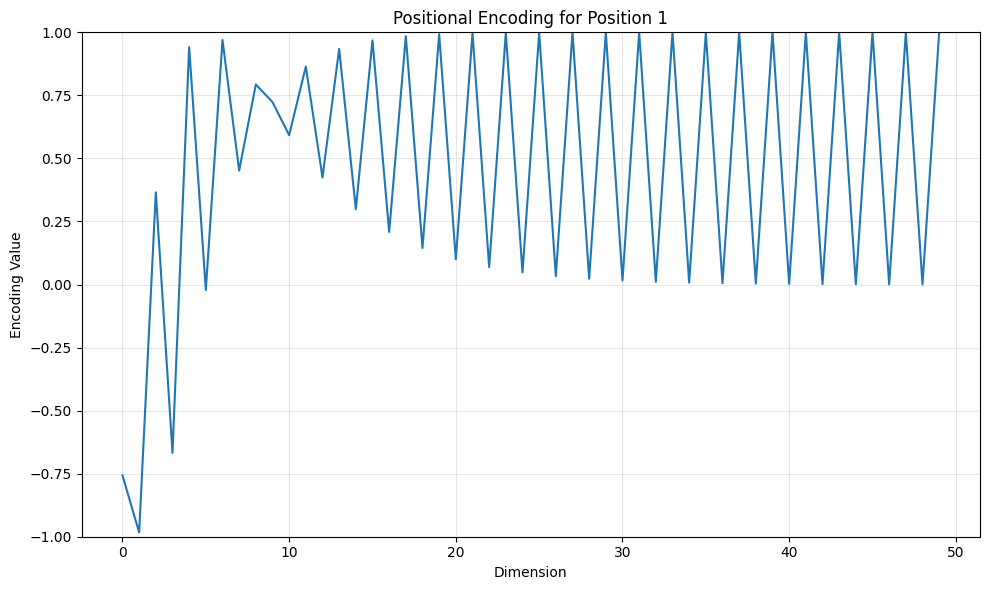

In [138]:

plt.figure(figsize=(10, 6))
plt.plot(range(embedding_dim),pos_encoding)
plt.title('Positional Encoding for Position 1')
plt.xlabel('Dimension')
plt.ylabel('Encoding Value')
plt.grid(True, alpha=0.3)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

### Positiona encoding comparison between positions

Postional encoding graphs for first 10 positions:

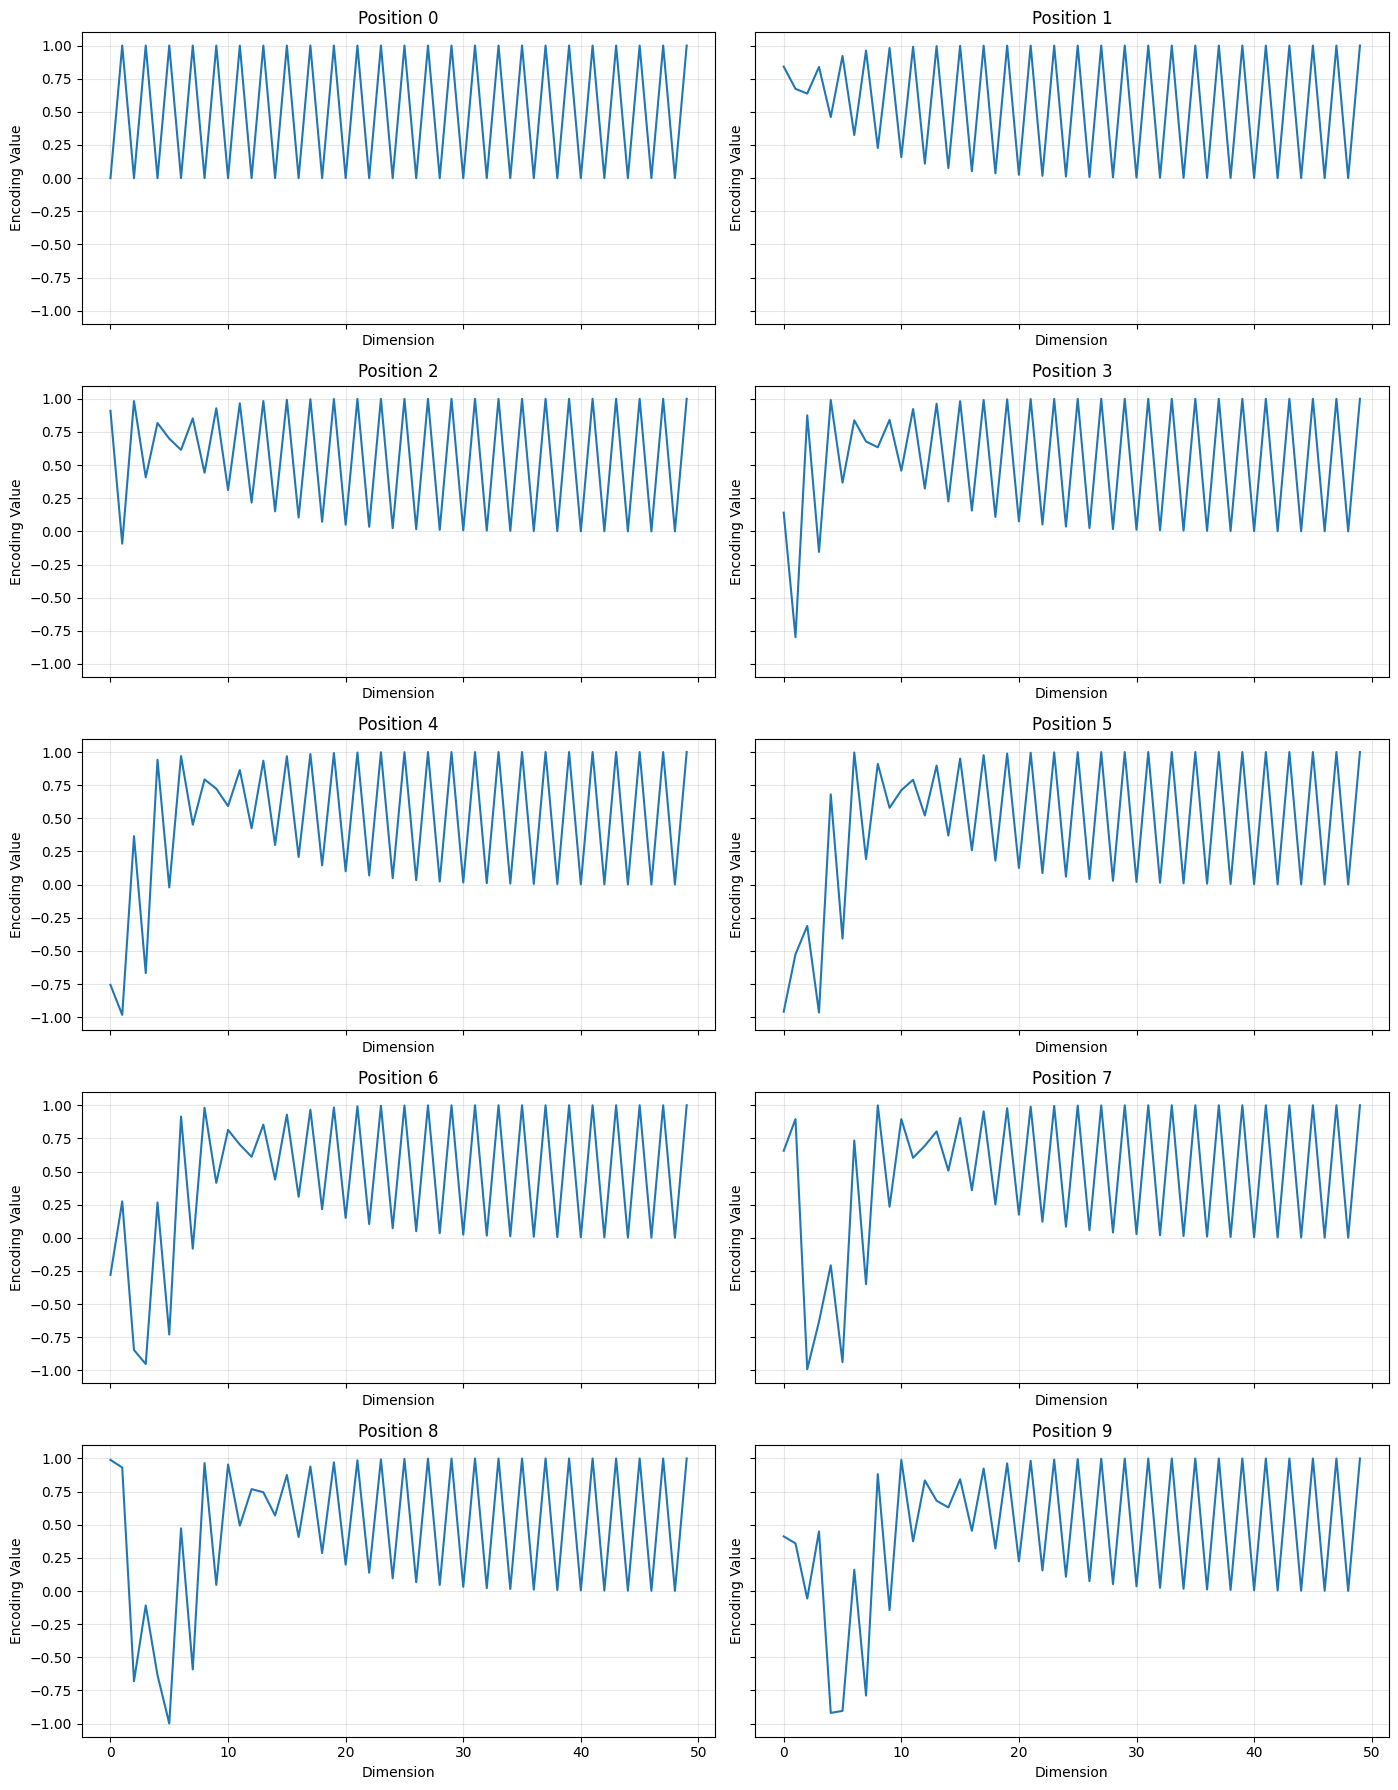

In [139]:
fig, axes = plt.subplots(5, 2, figsize=(14, 18), sharex=True, sharey=True)
axes = axes.flatten() 

for i in range(10):
    pos_encoding, frequencies = get_position_encoding(embedding_dim, position=i)
    ax = axes[i]
    ax.plot(range(embedding_dim), pos_encoding)
    ax.set_title(f'Position {i}')
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Encoding Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

One plot for first 5 positions:

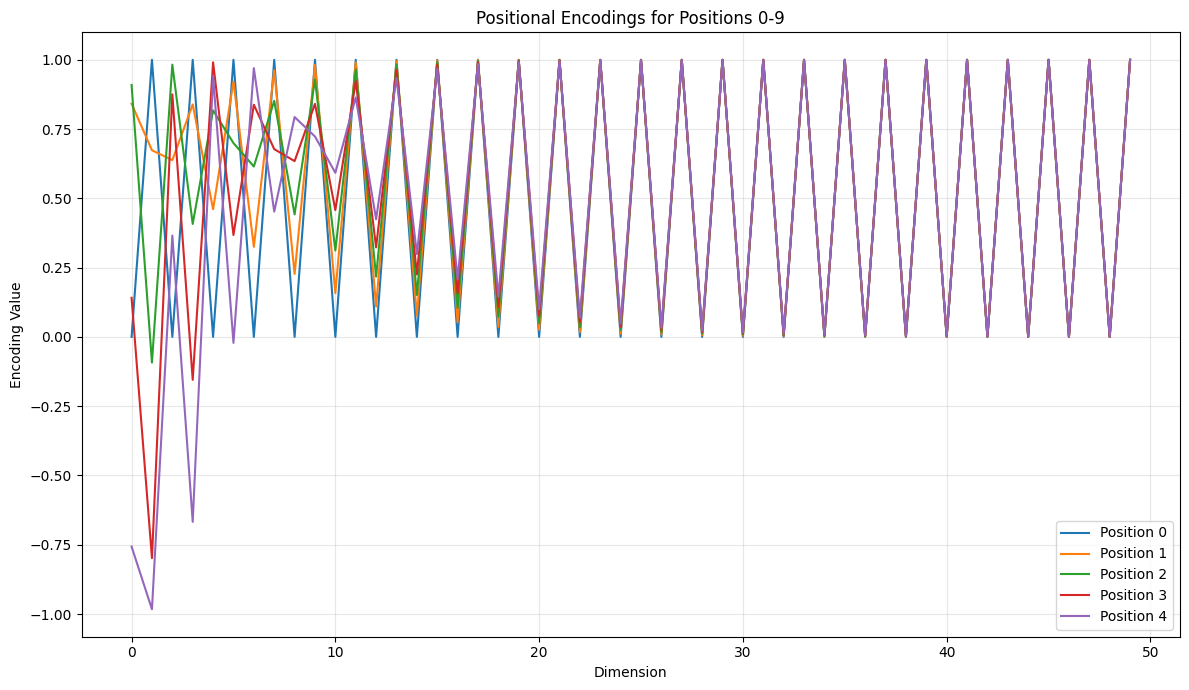

In [140]:
plt.figure(figsize=(12, 7))
for i in range(5):
    pos_encoding, frequencies = get_position_encoding(embedding_dim, position=i)
    plt.plot(range(embedding_dim), pos_encoding, label=f'Position {i}')
plt.title('Positional Encodings for Positions 0-9')
plt.xlabel('Dimension')
plt.ylabel('Encoding Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Positional encoding difference between positions:

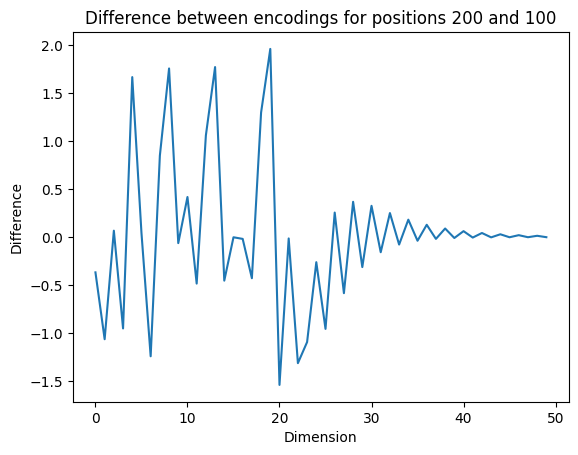

In [ ]:
enc1, frequencies1 = get_position_encoding(embedding_dim, position=10)
enc2, frequencies2 = get_position_encoding(embedding_dim, position=20)
plt.plot(enc2 - enc1)
plt.title("Difference between encodings for positions 20 and 10")
plt.xlabel("Dimension")
plt.ylabel("Difference")
plt.show()